In [10]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

def get_sentences(filename):
    """ Return sentences given a text file.
        The sentences will be tokenized in this function.
    """
    with open(filename, mode='r', encoding="ISO-8859-1") as f:
        data = f.read()
    sentences = nltk.sent_tokenize(data)
    return sentences

labelled_real='labelled_real_text.csv'
labelled_fake='labelled_fake_text.csv'

# file_dir = os.path.dirname(os.path.realpath('__file__'))
# filename = os.path.join(file_dir, filepath)
# filename = os.path.abspath(os.path.realpath(filename))

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

combined_data = real_data.append(fake_data)
print(data)

y = combined_data['label'].values

       index                                               text   novelty  \
0          0  What this group does is to take down various d...  0.750000   
1          1  Over 1 , 600 a day have reached Greece this mo...  0.694444   
2          2  We ' re working through a legacy period , with...  0.676471   
3          3  The first time anyone says you need help , I '...  0.628571   
4          4  Out of those who came last year , 69 per cent ...  0.703704   
5          5  He has not played for Tottenham ' s first team...  0.604651   
6          6  So you have this man who seems to represent th...  0.687500   
7          7  CNN : You made that promise , but it wasn ' t ...  0.666667   
8          8  This is a part of the population that is notor...  0.705882   
9          9  They picked him off three times and kept him o...  0.696970   
10        10  The treatment was going to cost Â£ 12 , 000 , ...  0.666667   
11        11  But if black political power is so important ,...  0.692308   

## Classify using both novelty and diversity

input dimensions: 21554 | output dimensions: 21554
x_train dimensions: 19398 | y_train dimensions: 19398
x_test dimensions: 2156 | y_test dimensions: 2156
             precision    recall  f1-score   support

          0       0.92      0.93      0.92      1071
          1       0.93      0.92      0.92      1085

avg / total       0.92      0.92      0.92      2156

0.923469387755102
[[996  75]
 [ 90 995]]


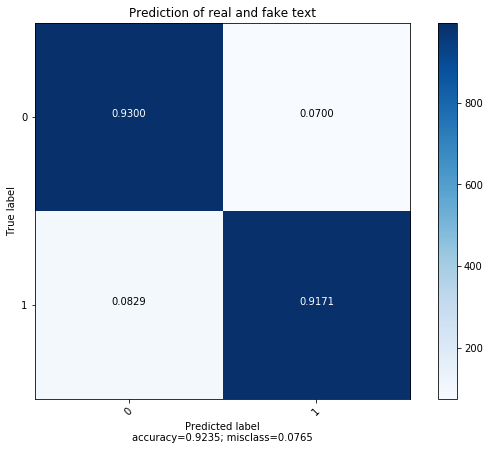

In [33]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

x = list()
for ix, nov in enumerate(novs):
    x.append([nov, divs[ix]])

x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = 0.10)

print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

# Initialize classifier
rfc = RandomForestClassifier()

# Train classifier
model = rfc.fit(x_train, train_labels)

# Make predictions
y_preds = rfc.predict(test)

# Evaluate model
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_labels, y_preds))
print(accuracy_score(test_labels, y_preds))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, y_preds))


plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds),                  # confusion matrix created by
                                                          # sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph

## Classify using only novelty

input dimensions: 21554 | output dimensions: 21554
x_train dimensions: 19398 | y_train dimensions: 19398
x_test dimensions: 2156 | y_test dimensions: 2156
             precision    recall  f1-score   support

          0       0.66      0.74      0.70      1100
          1       0.69      0.60      0.64      1056

avg / total       0.67      0.67      0.67      2156

0.6702226345083488
[[811 289]
 [422 634]]


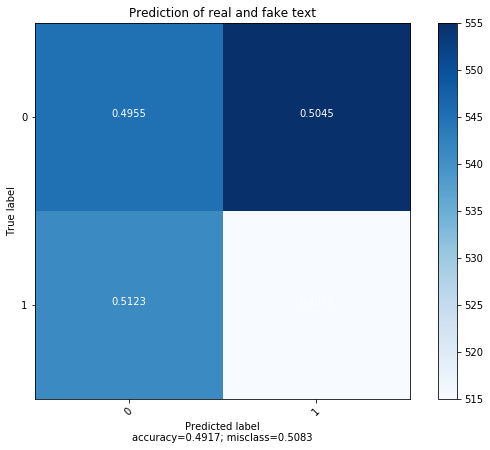

In [34]:
novs = combined_data['novelty'].values

x = []
for ix, nov in enumerate(novs):
    x.append([nov])

x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = 0.10)

print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

# Initialize classifier
rfc = RandomForestClassifier()

# Train classifier
model = rfc.fit(x_train, train_labels)

# Make predictions
preds = rfc.predict(test)

# Evaluate model
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_labels, preds))
print(accuracy_score(test_labels, preds))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, preds))


plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds),                  # confusion matrix created by
                                                          # sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph

## Classify using only diversity

In [29]:
divs = combined_data['diversity'].values

x = []
for ix, div in enumerate(divs):
    x.append([div])

x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = 0.10)

print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

# Initialize classifier
rfc = RandomForestClassifier()

# Train classifier
model = rfc.fit(x_train, train_labels)

# Make predictions
preds = rfc.predict(test)

# Evaluate model
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_labels, preds))
print(accuracy_score(test_labels, preds))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, preds))

input dimensions: 21554 | output dimensions: 21554
x_train dimensions: 19398 | y_train dimensions: 19398
x_test dimensions: 2156 | y_test dimensions: 2156
             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1073
          1       0.90      0.83      0.86      1083

avg / total       0.87      0.87      0.87      2156

0.8668831168831169
[[973 100]
 [187 896]]


## Classify with both novelty and diversity: test with unseen data (TBD)

In [24]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

x = list()
for ix, nov in enumerate(novs):
    x.append([nov, divs[ix]])
    
# unlabelled_real='unlabelled_real_text.csv' # not really unlabelled, just missing novelty and diversity
# unlabelled_fake='unlabelled_fake_text.csv' # same here

# _real_data = pd.read_csv(unlabelled_real)
# _fake_data = pd.read_csv(unlabelled_real)

# _combined_data = _real_data.append(_fake_data)

# x_train, test, train_labels, test_labels = x,  , y, _combined_data['label'].values

x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = 0.10)

print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

# Initialize classifier
rfc = RandomForestClassifier()

# Train classifier
model = rfc.fit(x_train, train_labels)

# Make predictions
preds = rfc.predict(test)

# Evaluate model
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_labels, preds))
print(accuracy_score(test_labels, preds))

input dimensions: 21554 | output dimensions: 21554
x_train dimensions: 19398 | y_train dimensions: 19398
x_test dimensions: 2156 | y_test dimensions: 2156
             precision    recall  f1-score   support

          0       0.92      0.94      0.93      1082
          1       0.94      0.92      0.93      1074

avg / total       0.93      0.93      0.93      2156

0.9271799628942486
